In [17]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
import pandas as pd
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
print(df.head())

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


In [19]:
df.drop("article_link",axis = 1)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [20]:
sentences = df['headline'].tolist()
labels = df['is_sarcastic'].tolist()

In [21]:
training_size = 20000
# splitting data for training and testing
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [23]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - 7ms/step - accuracy: 0.5532 - loss: 0.6860 - val_accuracy: 0.5285 - val_loss: 0.6633
Epoch 2/30
625/625 - 3s - 4ms/step - accuracy: 0.7316 - loss: 0.5638 - val_accuracy: 0.8108 - val_loss: 0.4631
Epoch 3/30
625/625 - 4s - 6ms/step - accuracy: 0.8218 - loss: 0.4178 - val_accuracy: 0.8045 - val_loss: 0.4186
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.8464 - loss: 0.3628 - val_accuracy: 0.8016 - val_loss: 0.4117
Epoch 5/30
625/625 - 3s - 4ms/step - accuracy: 0.8651 - loss: 0.3227 - val_accuracy: 0.8460 - val_loss: 0.3526
Epoch 6/30
625/625 - 7s - 11ms/step - accuracy: 0.8772 - loss: 0.2970 - val_accuracy: 0.8213 - val_loss: 0.3843
Epoch 7/30
625/625 - 4s - 6ms/step - accuracy: 0.8899 - loss: 0.2696 - val_accuracy: 0.8587 - val_loss: 0.3340
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.8995 - loss: 0.2497 - val_accuracy: 0.8514 - val_loss: 0.3390
Epoch 9/30
625/625 - 5s - 7ms/step - accuracy: 0.9060 - loss: 0.2322 - val_accuracy: 0.8232 - val_loss: 0.3981


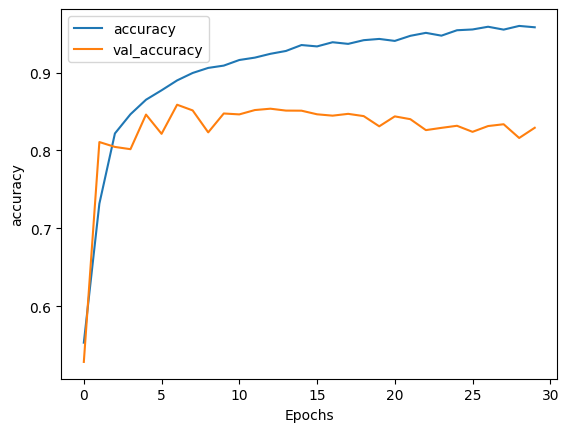

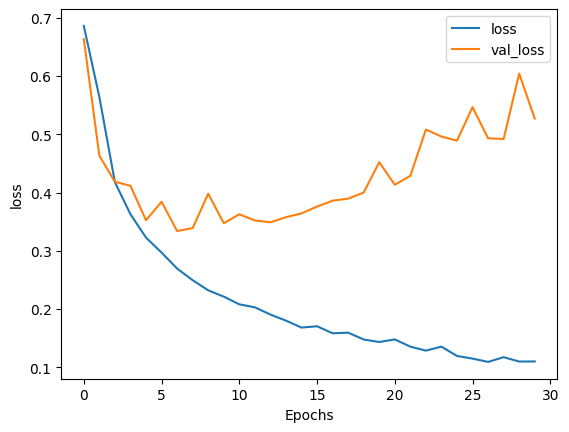

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [30]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [31]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [65]:
sentence = []
num = int(input("no of sentences to evaluate :"))
for i in range(num):
  line = input("Please enter the sentences to be judged for sarcasm :")
  sentence.append(line)

no of sentences to evaluate :5
Please enter the sentences to be judged for sarcasm :Fantastic, more unsolicited advice from experts.
Please enter the sentences to be judged for sarcasm :work with hands not mouth
Please enter the sentences to be judged for sarcasm :let's have a cupcake
Please enter the sentences to be judged for sarcasm :Great Another broken appliance to fix
Please enter the sentences to be judged for sarcasm :will you marry me?


In [67]:
# sample sentences below to test if u dont wanna give input manually just un-comment the below line
# sentence = ["granny starting to fear spiders in the garden might be real", "let's have a cupcake", "work with hands not mouth"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print(model.predict(padded))

df1 = pd.DataFrame()
df1['sentences'] = sentence
df1['predictions'] = model.predict(padded)
df1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,sentences,predictions
0,"Fantastic, more unsolicited advice from experts.",0.982291
1,work with hands not mouth,0.991677
2,let's have a cupcake,0.004912
3,Great Another broken appliance to fix,0.774667
4,will you marry me?,0.005117
